# Regresión lineal

El modelo de regresión lineal es un modelo matemático usado para **aproximar la relación de dependencia entre una variable dependiente numérica y continua "y", y las variables independientes "x"**, así como un término aleatorio **épsilon** que corresponde al error o ruido de nuestros modelos.

![img](https://i.imgur.com/hIIwIZH.png)

El **objetivo final** de este modelo es minimizar la distancia cuadrática de todos los puntos en relación a una recta: **la recta de regresión lineal**.

A la variable "y" se le llama **independiente**, pero también vas a escuchar **respuesta**, y a las **explicativas o regresoras** "x" también se les puede llamar **dependientes".

Al tratarse de un modelo matemático, esta aproximación a la modelización de datos **requiere que se cumplan algunos supuestos:**
- Relación lineal entre variables.
    - Esto implica que al incrementar "x" unidades, una de las variables regresoras se incremente, en promedio, beta veces la variable respuesta.
- Errores independientes entre sí.
    - Las variables explicativas no están relacionadas linealmente entre ellas.
- Homocedasticidad
    - Se asume que los errores tengan varianza constante.
    - En terminología matemática se expresa como que los errores son homocedásticos, esto implica que si, por ejemplo, intentamos predecir los salarios en base a la edad, vamos a encontrar errores de la misma magnitud para gente joven que para gente mayor.
- E(epsilon) = 0
    - Los erroes tengan una esperanza matemática igual a cero.
    - Los errores no van a tener sistemáticamente una tendencia positiva o negativa, es decir, vamos a predecir algunos casos por encima de su valor real y algunos por debajo, pero nunca todos por encima o todos por debajo.
- El error total sea la suma de todos los errores.

### Modelo para predecir el retraso en las aerolíneas estadounidenses

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv(r"/home/flavioisay/MEGAsync/Python para data science y big data esencial/base_datos_2008.csv")


In [3]:
df = df.dropna(subset = ['ArrDelay']) # Eliminar los datos faltantes
df = df.sample(frac = 1).head(100000) # Seleccionar un subset de 100,000 y se mezclan
Y = df['ArrDelay'] # Tratar de predecir el retraso en la llegada
X = df[['DepDelay']] # A partir con el retraso en la salida
# Estas variables están muy correlacionadas por lo que se obtendrá un modelo muy predictivo

In [5]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
regr = linear_model.LinearRegression() # Ajustar el modelo
regr.fit(X,Y) # Decirle que lo ajuste con X y con Y

print('Coeficientes: ', regr.coef_) # Imprimir el valor de las beta
Y_pred = regr.predict(X) # Encontrar los valores que genera el modelo, es decir las predicciones
print("R cuadrado: ",r2_score(Y, Y_pred)) # Aproximación de qué tan bueno es el modelo
# Es el porcentaje de varianza que explica el modelo
# Entre más próximo a uno es un modelo mejor

Coeficientes:  [1.02353485]
R cuadrado:  0.8666378628508091


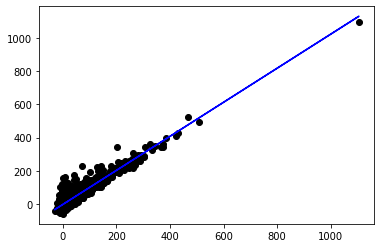

In [8]:
plt.scatter(X[1:10000],Y[1:10000],color = 'black') # Mostrar resultados, los puntos
plt.plot(X[1:10000],Y_pred[1:10000],color = 'blue') # Se añade la recta de regresión
plt.show() # Se observa que el modelo es uno bueno para predecir este tipo de datos

### Ajustar modelos cuando las variables regresoras (x) son categóricas

In [13]:
X = df[['AirTime','Distance','TaxiIn','TaxiOut']] # Conjunto de variables cuantitativas

df['Month'] = df['Month'].apply(str) # Tratar a las variables como categóricas ya que no tienen una escala lógica
df['DayofMonth'] = df['DayofMonth'].apply(str) # Convierte la columna en texto
df['DayOfWeek'] = df['DayOfWeek'].apply(str)

# Convertir en variables dummies
# Una variable dummy es una variable que toma un valor uno o cero en función de si aparece la categoría que estamos estudiando.
dummies = pd.get_dummies(data = df[['Month','DayofMonth','DayOfWeek','Origin','Dest']])
x = dummies.add(X,fill_value = 0)

In [16]:
x.columns # Se obtiene una columna para cada origen, destino etc.

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=652)

In [17]:
regr = linear_model.LinearRegression() # Ajustar el modelo con 650 variables
regr.fit(X,Y)

# print('Coeficientes: ', regr.coef_)
Y_pred = regr.predict(X)
print('R cuadrado: ', r2_score(Y, Y_pred))
# Esta es una situación más realista porque son variables que se pueden controlar de antemano

R cuadrado:  0.1388084414738764


In [18]:
X = X.add(df[['DepDelay']],fill_value = 0) # Añadir la columan del retraso de salida a todas las columnas en X

In [19]:
regr = linear_model.LinearRegression() # Volver a justar el modelo con toda la información generada
regr.fit(X,Y)

Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred)) # Este modelo es prácticamente perfecto
# Aquí se predicen internamente los datos



R cuadrado:  0.9444252310211521


Para ajustar un buen modelo, lo que deberíamos hacer en este caso, si lo que queremos es ver efectivamente cuál es el potencial explicativo o predictivo de este modelo, es usar nuevos datos y evaluar este modelo sobre ellos. Aquí lo que estamos haciendo es evaluar el modelo que hemos entrenado con estos datos sobre esos mismos datos, lo cual a veces puede llevar a sobreajustar los resultados.